In [6]:
from collections import Counter

def find_frequent_kmer(dna_string, k):

    k_mers = [dna_string[i:i+k] for i in range(len(dna_string) - k + 1)]
    
    k_mer_count = Counter(k_mers)
    
    most_frequent = k_mer_count.most_common(1)

    return most_frequent

dna = "AGCTAGCTAGCTAGGCTA"
k = 3
most_frequent_kmer = find_frequent_kmer(dna, k)
print("Most frequent k-mer:", most_frequent_kmer)


Counter({'GCT': 4, 'CTA': 4, 'AGC': 3, 'TAG': 3, 'AGG': 1, 'GGC': 1})
Most frequent k-mer: [('GCT', 4)]


In [8]:
from collections import defaultdict, deque

def build_overlap_graph(kmers):
    graph = defaultdict(list)
    for kmer in kmers:

        for x in kmers:
            if kmer != x and kmer[1:] == x[:-1]:
                graph[kmer].append(x)

    return graph

# Function to find a Hamiltonian path using depth-first search (DFS)
def find_hamiltonian_path(graph, start_node, visited, path):
    visited.add(start_node)
    path.append(start_node)

    if len(visited) == len(graph):
        return True

    for neighbor in graph[start_node]:
        if neighbor not in visited:
            if find_hamiltonian_path(graph, neighbor, visited, path):
                return True

    path.pop()
    visited.remove(start_node)
    return False

# Function to reconstruct the string from the Hamiltonian path
def reconstruct_from_path(path):
    # Start with the first k-mer
    reconstructed_string = path[0]

    # Append only the last character of each subsequent k-mer
    for kmer in path[1:]:
        reconstructed_string += kmer[-1]

    return reconstructed_string
kmers = ["ATT", "TTA", "TAC", "ACC", "CCA", "CAC"]

graph = build_overlap_graph(kmers)
print(graph)

# Find the Hamiltonian path
start_node = kmers[0]  # Start from the first k-mer
path = []
visited = set()

if find_hamiltonian_path(graph, start_node, visited, path):
    print("Hamiltonian path found:", path)

    # Reconstruct the original sequence from the path
    reconstructed_string = reconstruct_from_path(path)
    print("Reconstructed string:", reconstructed_string)
else:
    print("No Hamiltonian path found.")


defaultdict(<class 'list'>, {'ATT': ['TTA'], 'TTA': ['TAC'], 'TAC': ['ACC'], 'ACC': ['CCA'], 'CCA': ['CAC'], 'CAC': ['ACC']})
Hamiltonian path found: ['ATT', 'TTA', 'TAC', 'ACC', 'CCA', 'CAC']
Reconstructed string: ATTACCAC


In [17]:
from collections import defaultdict

# Function to construct the de Bruijn graph from k-mers
def de_bruijn_graph(kmers):
    graph = defaultdict(list)

    for kmer in kmers:
        prefix = kmer[:-1]  # Prefix of length k-1
        suffix = kmer[1:]   # Suffix of length k-1
        graph[prefix].append(suffix)

    return graph

# Function to print the de Bruijn graph
def print_de_bruijn_graph(graph):
    for prefix, suffixes in graph.items():
        for suffix in suffixes:
            print(f"{prefix} -> {suffix}")

# Example usage
kmers = ["ATT", "TTA", "TAC", "ACC", "CCA", "CAC"]

# Build the de Bruijn graph
graph = de_bruijn_graph(kmers)

# Print the graph
print("De Bruijn Graph:")
print_de_bruijn_graph(graph)


De Bruijn Graph:
AT -> TT
TT -> TA
TA -> AC
AC -> CC
CC -> CA
CA -> AC


In [ ]:
from itertools import permutations

def peptide_mass(peptide, mass_table):
    return sum(mass_table[aa] for aa in peptide)

def branch_and_bound(spectrum, mass_table):
    parent_mass = max(spectrum)
    peptides = [""]
    results = []

    while peptides:
        new_peptides = []
        for peptide in peptides:
            for aa in mass_table:
                new_peptide = peptide + aa
                mass = peptide_mass(new_peptide, mass_table)

                if mass in spectrum:
                    new_peptides.append(new_peptide)
                    if mass == parent_mass:
                        results.append(new_peptide)
        
        peptides = new_peptides

    return results

# Example: Monoisotopic mass table for a few amino acids
mass_table = {
    'G': 57, 'A': 71, 'S': 87, 'P': 97, 'V': 99,
    'T': 101, 'C': 103, 'I': 113, 'L': 113, 'N': 114,
    'D': 115, 'K': 128, 'Q': 128, 'E': 129, 'M': 131,
    'H': 137, 'F': 147, 'R': 156, 'Y': 163, 'W': 186
}

# Example spectrum (replace with real spectrum data)
spectrum = [0, 113, 128, 186, 241, 299, 314, 427]
 # Example masses

print(branch_and_bound(spectrum, mass_table))

Cyclic peptides found:
IKW
IQW
IWK
IWQ
LKW
LQW
LWK
LWQ
KIW
KLW
KWI
KWL
QIW
QLW
QWI
QWL
WIK
WIQ
WLK
WLQ
WKI
WKL
WQI
WQL


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.3 MB/s eta 0:00:00


In [ ]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

def blast_sequence(seq):
    result_handle = NCBIWWW.qblast("blastn", "nt", seq)
    blast_record = NCBIXML.read(result_handle)

    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            print("*Alignment*")
            print("Sequence:", alignment.title)
            print("Length:", alignment.length)
            print("Score:", hsp.score)
            print("E-value:", hsp.expect)

query_seq = "ATGCGTACGTAGCTAGCTGACTGATCGTAGCTAGCTGACGTAGCTAGCATCGTACG"
blast_sequence(query_seq)


*Alignment*
Sequence: gi|2556671748|gb|CP130814.1| Mycobacterium tuberculosis strain MTb-Oman-321528 chromosome, complete genome
Length: 4325733
Score: 50.0
E-value: 0.194138
*Alignment*
Sequence: gi|2556671748|gb|CP130814.1| Mycobacterium tuberculosis strain MTb-Oman-321528 chromosome, complete genome
Length: 4325733
Score: 50.0
E-value: 0.194138
*Alignment*
Sequence: gi|2556671656|gb|CP130773.1| Mycobacterium tuberculosis strain MTb-Oman-3214236 chromosome, complete genome
Length: 4340326
Score: 48.0
E-value: 0.67761
*Alignment*
Sequence: gi|2556671656|gb|CP130773.1| Mycobacterium tuberculosis strain MTb-Oman-3214236 chromosome, complete genome
Length: 4340326
Score: 48.0
E-value: 0.67761
*Alignment*
Sequence: gi|2556671674|gb|CP130787.1| Mycobacterium tuberculosis strain MTb-Oman-3213343 chromosome, complete genome
Length: 4385227
Score: 48.0
E-value: 0.67761
*Alignment*
Sequence: gi|2556671674|gb|CP130787.1| Mycobacterium tuberculosis strain MTb-Oman-3213343 chromosome, complete ge

In [ ]:
def variant_calling(ref, sample):
    i, j, variants = 0, 0, []

    while i < len(ref) or j < len(sample):
        if i < len(ref) and j < len(sample) and ref[i] == sample[j]:
            i, j = i + 1, j + 1
        elif i < len(ref) and j < len(sample):
            variants.append(("SNP", i + 1, ref[i], sample[j]))
            i, j = i + 1, j + 1
        elif i < len(ref):
            variants.append(("Deletion", i + 1, ref[i]))
            i += 1
        else:
            variants.append(("Insertion", j + 1, sample[j]))
            j += 1

    return variants

# Example usage
ref = "ACGTACGTACGT"
sample = "ACGTTGGTACG"

for v in variant_calling(ref, sample):
    if v[0] == "SNP":
        print(f"SNP at {v[1]}: {v[2]} -> {v[3]}")
    elif v[0] == "Insertion":
        print(f"Insertion at {v[1]}: {v[2]} inserted")
    else:
        print(f"Deletion at {v[1]}: {v[2]} deleted")

Identified variants:
SNP at position 5: A -> T
SNP at position 6: C -> G
Deletion at position 12: T deleted


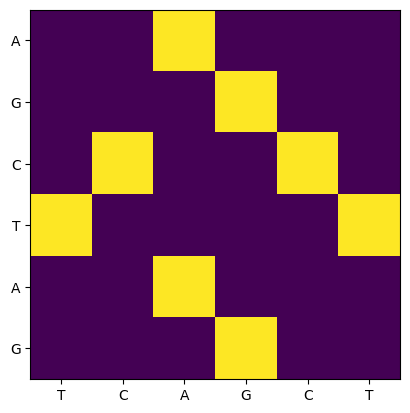

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def dotplot(seq1, seq2):
    matrix = np.zeros((len(seq1), len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                matrix[i][j] = 1

    plt.imshow(matrix)
    plt.xticks(range(len(seq2)), seq2)
    plt.yticks(range(len(seq1)), seq1)
    plt.show()

seq1 = "AGCTAG"
seq2 = "TCAGCT"
dotplot(seq1, seq2)

In [ ]:
def match_mismatch_score(seq1, seq2, match_score=1, mismatch_penalty=-1):
    """
    Function to compute the match/mismatch score between two sequences.

    Parameters:
    - seq1: First sequence (string)
    - seq2: Second sequence (string)
    - match_score: Score for a match (default = 1)
    - mismatch_penalty: Penalty for a mismatch (default = -1)

    Returns:
    - total_score: Total score based on match/mismatch
    """
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length")

    total_score = 0

    # Compare each base pair in the aligned sequences
    for base1, base2 in zip(seq1, seq2):
        if base1 == base2:
            total_score += match_score  # Match score
        else:
            total_score += mismatch_penalty  # Mismatch penalty

    return total_score

# Example usage
seq1 = "AGCTTAGC"
seq2 = "AGCTCAGC"

# Calculate the match/mismatch score with default scoring scheme
score = match_mismatch_score(seq1, seq2)

print(f"Match/Mismatch score between '{seq1}' and '{seq2}': {score}")


Match/Mismatch score between 'AGCTTAGC' and 'AGCTCAGC': 6


In [29]:
import numpy as np

def needleman_wunsch(s1, s2, m=2, mm=-1, g=-2):
    r, c = len(s1) + 1, len(s2) + 1
    M = np.zeros((r, c), int)
    M[:, 0], M[0, :] = np.arange(r) * g, np.arange(c) * g

    for i in range(1, r):
        for j in range(1, c):
            M[i, j] = max(M[i-1, j-1] + (m if s1[i-1] == s2[j-1] else mm), M[i-1, j] + g, M[i, j-1] + g)

    a1, a2, i, j = "", "", len(s1), len(s2)
    while i or j:
        if i and j and M[i, j] == M[i-1, j-1] + (m if s1[i-1] == s2[j-1] else mm):
            a1, a2, i, j = s1[i-1] + a1, s2[j-1] + a2, i-1, j-1
        elif i and M[i, j] == M[i-1, j] + g:
            a1, a2, i = s1[i-1] + a1, "-" + a2, i-1
        else:
            a1, a2, j = "-" + a1, s2[j-1] + a2, j-1
    print(M)
    return a1, a2, M[-1, -1]

s1, s2 = "CGATATGA", "CCACATGA"
a1, a2, score = needleman_wunsch(s1, s2)
print(f"Score: {score}\n{s1}: {a1}\n{s2}: {a2}")

[[  0  -2  -4  -6  -8 -10 -12 -14 -16]
 [ -2   2   0  -2  -4  -6  -8 -10 -12]
 [ -4   0   1  -1  -3  -5  -7  -6  -8]
 [ -6  -2  -1   3   1  -1  -3  -5  -4]
 [ -8  -4  -3   1   2   0   1  -1  -3]
 [-10  -6  -5  -1   0   4   2   0   1]
 [-12  -8  -7  -3  -2   2   6   4   2]
 [-14 -10  -9  -5  -4   0   4   8   6]
 [-16 -12 -11  -7  -6  -2   2   6  10]]
Score: 10
CGATATGA: CGATATGA
CCACATGA: CCACATGA
